In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Kyphosis:
Kyphosis is a spinal disorder in which an excessive outward curve of the spine results in an abnormal rounding of the upper back. The condition is sometimes known as "roundback" or—in the case of a severe curve—as "hunchback." Kyphosis can occur at any age, but is common during adolescence.
Risk Factors: Adolescence

In [3]:
kyp = pd.read_csv('kyphosis.csv')

In [4]:
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


So ths dataset essentially represents a number of patients who had kyphosis and then they had an operation and that operation was a corrective spinal surgery and this dataframe basically represents whether or not the kyphosis condition was absent or present after the operation,
Age represents the age of a person in months so this is the data on childrens,
Number represents the number of vertabrae involved in the operation,
And the Start  was the number of the first or the top most vertibrae that was operated on.

In [5]:
kyp.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [6]:
kyp.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [8]:
kyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


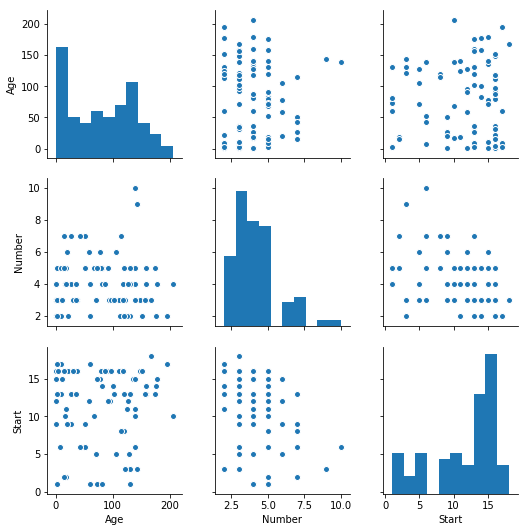

In [9]:
sns.pairplot(data=kyp)

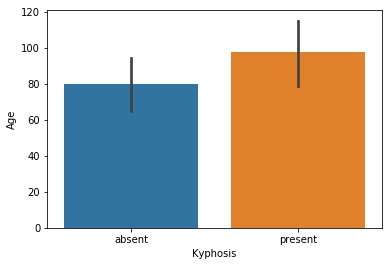

In [10]:
sns.barplot(x=kyp['Kyphosis'],y=kyp['Age'])

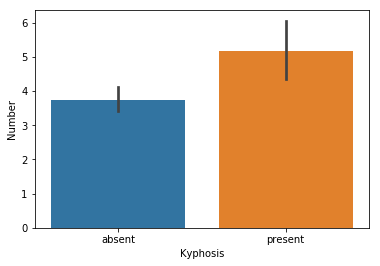

In [11]:
sns.barplot(x=kyp['Kyphosis'],y=kyp['Number'])

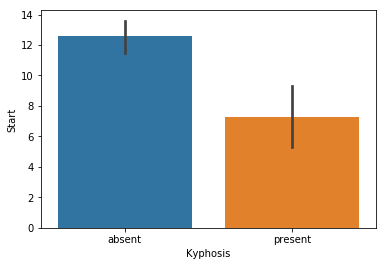

In [12]:
sns.barplot(x=kyp['Kyphosis'],y=kyp['Start'])

In [42]:
from sklearn.cross_validation import train_test_split

In [43]:
X = kyp.drop('Kyphosis',axis=1)

In [44]:
y = kyp['Kyphosis']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=402)

import DecisionTreeClassifier for classification problems and DecisionTreeRegressor for Regressin prblems

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtree = DecisionTreeClassifier()

In [62]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
predictons = dtree.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print('Classificaton_Report:',classification_report(y_test,predictons))
print('\n\nConfusion_Matrix:',confusion_matrix(y_test,predictons))

Classificaton_Report:              precision    recall  f1-score   support

     absent       0.89      0.77      0.83        22
    present       0.17      0.33      0.22         3

avg / total       0.81      0.72      0.76        25



Confusion_Matrix: [[17  5]
 [ 2  1]]


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier(n_estimators=200)

In [100]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
pred = rfc.predict(X_test)

In [102]:
print(confusion_matrix(y_test,pred))


[[18  4]
 [ 2  1]]
             precision    recall  f1-score   support

     absent       0.90      0.82      0.86        22
    present       0.20      0.33      0.25         3

avg / total       0.82      0.76      0.78        25

